In [1]:
import os
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [2]:
!pip install -q -U tensorflow-text
!pip install -q tf-models-official
# !pip install -q transformers sentencepiece


In [3]:
df = pd.read_csv('final_output.csv', index_col=0)
df.head()

,case_id,Name,Customer,Description,Consultant,keyprod
0,5df22d8e749c4651c2aeb398,BJB API Development and Management,Bank Julius Bär,For the initial PoC phase starting in February...,Reinhard Heite,Api-connect
1,5df22d8e749c4651c2aeb398,BJB API Development and Management,Bank Julius Bär,For the initial PoC phase starting in February...,Konstantin Konson,Api-connect
2,5df22d8e749c4651c2aeb398,BJB API Development and Management,Bank Julius Bär,For the initial PoC phase starting in February...,Konstantin Konson,Api-connect
3,5dd29375f78aa9000882ec09,API Gateway Management services,Cembra,API Connect Installation skills Specifical...,Konstantin Konson,Api-connect
4,5dee49d8d56d0500082c28c9,IFRS 16 move to IBM cloud – Senior ICM developer,KPMG,See also attached file General requirements ...,Ras Alungei,Business Process Management


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
le_y = LabelEncoder()
col_name = ' Consultant'
y = df[[col_name]].values.ravel()
le_y.fit(y)
y_le = le_y.transform(y)

In [6]:
import pickle
pickle.dump(le_y,open('label_encoder.pkl','wb'))

In [7]:
classes = len(np.unique(y_le))
classes

130

In [8]:
desc_cons = {}

for i,row in df.iterrows():
    consultant = row.loc[' Consultant']
    description = row.loc['Description']
    if description not in desc_cons.keys():
        desc_cons[description] = [le_y.transform([consultant])[0]]
    else:
        desc_cons[description].append(le_y.transform([consultant])[0])

In [9]:
([x for x in list(desc_cons.values()) if len(x)==11])

[[51, 49, 63, 119, 9, 8, 118, 10, 71, 117, 14]]

In [10]:
print('Description of Tasks on which more than 3 consultants are assigned\n')
count=0
for x,y in desc_cons.items():
  if len(y)>3:
    print(x)
    count+=1
print('Count: ',count)


Description of Tasks on which more than 3 consultants are assigned

AIB need an experienced Case Manager Integration specialist to work with a BPM infrastructure consultant  The 2 consultants will work together to migrate BPM 8 6  or 8 5 x  to BAW 19 3  The Case Manager will also need to assist them in porting testing their custom code integrations with the Case Manager  or validating their test plan     1  How to configure for Case Management  2  How to configure Content Navigator  3  How to configure Content navigator to talk to our remote ECM  4  How to configure the new rules components inside BAW   The most important part is to understand point 1    the rest is a nice to have at this stage   Ideally someone who has experience with IBM BPM 8 5 x or 8 6 -  BAW migration experience potentially some of IBM BAW Case Manager integration  Filenet  IBM BPM integration with IBM Content Manager -  development skills Content Migration  from IBM Content Manager to IBM Filenet   IBM Filenet ar

In [11]:
print('Description of Tasks on which more than 3 consultants are assigned\n')
count=0
for x,y in desc_cons.items():
  if len(y)>4:
    print(x)
    count+=1
print('Count: ',count)

Description of Tasks on which more than 3 consultants are assigned

Skills required  Development  Integration  Implementation  Architect Roles   Lead Architect Integration Modernisation SME Supporting complementing the above role Supporting complementing the above role CPAT Architect - Supporting Complementing the above role IBM Integration Developer CP4Int SME   tech sales CP4Auto Modernization SME CP4Auto CTO BAI Developer 1 Cloud  Security Specialist CP4Auto SME   tech sales Garage Method Coach Garage Method Coach 2 Cloud Infrastructure Consultant 1 Cloud Infrastructure Consultant 2 CI CD Specialist Cloud Services Management Operations DE Cloud Services Management Operations SME Event Driven Architecture DE Event Driven Architecture  SME DevSecOps DE 
Count:  1


In [12]:
df.iloc[0].values

array(['5df22d8e749c4651c2aeb398', 'BJB API Development and Management',
       'Bank Julius Bär',
       'For the initial PoC phase starting in February  the skills required are  - Install API Manager in Azure Kubernetes Service or OpenShift on Azure   - Install API Manager on-prem Pivotal Kubernets or VM Ware - both options stated by client   - Support the installation of API Gateways   Analyitcs in Luxemburg  Singapore  Switzerland   Two profiles are required    1  Architect   2  Installation  Following the PoC  the implementation project will happen in Q2  Number of days for this phase has to be determined ',
       'Reinhard Heite', 'Api-connect'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 449
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   case_id      443 non-null    object
 1   Name         443 non-null    object
 2   Customer     443 non-null    object
 3   Description  443 non-null    object
 4    Consultant  443 non-null    object
 5   keyprod      443 non-null    object
dtypes: object(6)
memory usage: 24.2+ KB


In [14]:
df.columns

Index(['case_id', 'Name', 'Customer', 'Description', ' Consultant', 'keyprod'], dtype='object')

<BarContainer object of 1 artists>

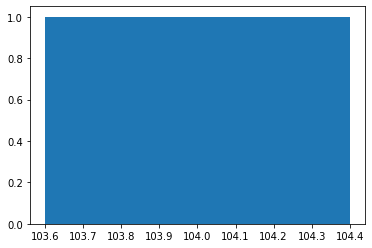

In [15]:
from collections import Counter
import matplotlib.pyplot as plt
consultants = Counter(y)
plt.bar(consultants.keys(), consultants.values())

In [16]:
consultants.most_common(5)

[(104, 1)]

<BarContainer object of 331 artists>

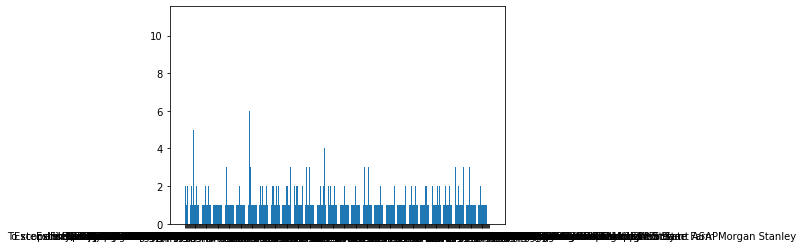

In [17]:
name = Counter(df['Name'])
plt.bar(name.keys(), name.values())

In [18]:
name.most_common(5)

[('CP4I and CP4A Garage Services Prod', 11),
 ('ILMT support', 6),
 ('Ladders Interface', 5),
 ('Generic PROJECT MANAGER', 5),
 ('MQ SME', 4)]

<BarContainer object of 274 artists>

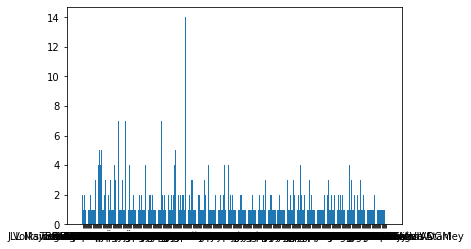

In [19]:
customer = Counter(df['Customer'])
plt.bar(customer.keys(), customer.values())

In [20]:
customer.most_common(5)

[('Standard Bank of South Africa  SBSA ', 14),
 ('SEB', 7),
 ('Swedbank', 7),
 ('Apleona', 7),
 ('NFUM', 5)]

In [21]:
description = Counter(df['Description'])

In [22]:
description.most_common(5)

[('Skills required  Development  Integration  Implementation  Architect Roles   Lead Architect Integration Modernisation SME Supporting complementing the above role Supporting complementing the above role CPAT Architect - Supporting Complementing the above role IBM Integration Developer CP4Int SME   tech sales CP4Auto Modernization SME CP4Auto CTO BAI Developer 1 Cloud\xa0 Security Specialist CP4Auto SME   tech sales Garage Method Coach Garage Method Coach 2 Cloud Infrastructure Consultant 1 Cloud Infrastructure Consultant 2 CI CD Specialist Cloud Services Management Operations DE Cloud Services Management Operations SME Event Driven Architecture DE Event Driven Architecture\xa0 SME DevSecOps DE ',
  11),
 ('AIB need an experienced Case Manager Integration specialist to work with a BPM infrastructure consultant  The 2 consultants will work together to migrate BPM 8 6  or 8 5 x  to BAW 19 3  The Case Manager will also need to assist them in porting testing their custom code integrations

<BarContainer object of 70 artists>

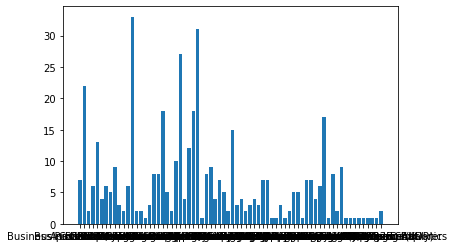

In [23]:
keyprod = Counter(df['keyprod'])
plt.bar(keyprod.keys(), keyprod.values())

In [24]:
keyprod.most_common(5)

[('Other Product', 33),
 ('Api Connect', 31),
 ('FileNet Content Manager', 27),
 ('Business Process Management', 22),
 ('BA Workflow', 18)]

In [25]:
np.sum(df.isna())

case_id        0
Name           0
Customer       0
Description    0
 Consultant    0
keyprod        0
dtype: int64

In [27]:
X= list(desc_cons.keys())
Y = np.array(list(desc_cons.values()))
print('Y before pad: \n',Y[:5])
print('Y after pad: \n',Y[:5])
Y_one_hot = np.zeros((len(Y),classes))
for i in range(len(Y)):
    for j in range(len(Y[i])):
        Y_one_hot[i,Y[i][j]] = 1


        

Y before pad: 
 [list([101, 63]) list([63]) list([100, 126]) list([72]) list([72])]
Y after pad: 
 [list([101, 63]) list([63]) list([100, 126]) list([72]) list([72])]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [28]:
Y_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
np.argmax(Y_one_hot[0],axis=0)

63

In [30]:
np.array(Y_one_hot)[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
X = np.array(X)
Y = np.array(Y_one_hot)
X.shape,Y.shape

((346,), (346, 130))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.05,shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((328,), (328, 130), (18,), (18, 130))

##Select Model

In [33]:
bert_model_name = 'bert_en_cased_L-12_H-768_A-12' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3


## next


In [34]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)


In [35]:
text_test = [X[0]]
text_preprocessed = bert_preprocess_model(text_test)
print(f'Text       : {X[0].split()[:12]}')
print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Text       : ['For', 'the', 'initial', 'PoC', 'phase', 'starting', 'in', 'February', 'the', 'skills', 'required', 'are']
Keys       : ['input_word_ids', 'input_type_ids', 'input_mask']
Shape      : (1, 128)
Word Ids   : [  101  1370  1103  3288 18959  1658  4065  2547  1107  1428  1103  4196]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [36]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [37]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3
Pooled Outputs Shape:(1, 768)
Pooled Outputs Values:[-0.12673461  0.07427684  0.98184997 -0.8820959   0.54548776  0.99205047
  0.17197382 -0.99966604 -0.57267714  0.08763666  0.7491834   0.96856093]
Sequence Outputs Shape:(1, 128, 768)
Sequence Outputs Values:[[ 0.36317337 -0.28703848 -0.03546232 ... -0.19700094  0.01388005
  -0.18758884]
 [ 0.2529226  -0.42854464  0.4099776  ...  0.03281882  0.01196936
  -0.03922565]
 [ 0.03288925 -0.4043657   0.3530454  ...  0.64622986 -0.38749403
   0.5260077 ]
 ...
 [ 0.13225529 -0.30628854 -0.20337783 ...  0.04409879  0.34891483
   0.19622228]
 [-0.37039688 -0.47125834  0.27533987 ...  0.7137102  -0.25118127
   0.5086505 ]
 [ 0.12355985 -0.31216058  0.6475371  ...  0.21827075 -0.06472331
   0.52898383]]


In [38]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=False, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.BatchNormalization()(net)
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1024, activation='relu', name='dense')(net)
  net = tf.keras.layers.BatchNormalization()(net)
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(classes, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [39]:
classifier_model = build_classifier_model()

In [40]:
loss = tf.keras.losses.BinaryCrossentropy()
metrics = [tf.metrics.TruePositives(), tf.metrics.FalsePositives()]

In [41]:
epochs = 100
steps_per_epoch = 100
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 1e-3
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [42]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)
es = tf.keras.callbacks.EarlyStopping(patience=25, monitor='loss',mode='min', restore_best_weights=True)

In [43]:

history = classifier_model.fit(x=X,y=Y,
                               epochs=epochs, validation_split=0.1,callbacks = [es])

Epoch 1/100


KeyboardInterrupt: ignored

In [ ]:
classifier_model.save_weights('classifier_model.hdf5')


In [45]:
classifier_model = build_classifier_model()
classifier_model.load_weights('/content/classifier_model.hdf5')

In [49]:
preds = classifier_model.predict(X_test)

In [47]:
X_test

array(['This is largely for BAW overview and administration enablement - effort as per PPT and I have included prep time for each session     8 days  for prep   6 client facing workshops  4 days - documenting good practices 3 days support  Q A - this will keep us involved as they complete their first application  end of April   key to positioning us for more work  Looking to start mid April - Ideally looking for Tim Pickrell but happy to consider other options  PPT document available ',
       'Proof of Technology sessions with the Aramco team  Go through the product features and explain examples and use case  This is similar to on-the-job training   If this workshop is successful  it may lead to further opportunities with this client  ',
       'Cloud migration project at D Ieteren  upgrade from IIB10 MQ to ACE on Azure ARO 4 6 with CP4I  GBS provides Openshift skills and developer  IIB expert to be provided by expert labs  Consultant from expert labs will be engaged via rev sharing D

In [ ]:
for i in range(len(y_test[0])):
    if y_train[0][i]==1:
        print(i)

38


In [70]:
pred_list = []
for pred in preds:
  pred = np.array(tf.math.top_k(pred,k=3,sorted=True)).T
  pred_list.append(pred)


In [75]:
map_list = []
for pred in pred_list:
    scores = pred[:,0]
    classes = pred[:,1].astype('int32')
    map={}
    for s,c in zip(scores,classes):
        c = le_y.inverse_transform([c])
        s= str(round(s*100))+'%'
        map.update({c[0]:s})
    map_list.append(map)

## Predictions of model

In [76]:
map_list

[{'Danni Luong': '1%', 'Derek Moyle': '2%', 'Gültekin Kirca': '95%'},
 {'Girish Venkatesh': '80%', 'Sudarsan Avs': '0%', 'Timothy Pickrell': '0%'},
 {'Giles Metcalf': '1%', 'Luca Floris': '0%', 'Richard Weber': '22%'},
 {'Rihard Cernigoj': '6%',
  'Theresa von Laffert': '90%',
  'Tomaž Paternoster': '1%'},
 {'Alan Murphy': '1%', 'Jan Flegr': '96%', 'Rihard Cernigoj': '1%'},
 {'John Wylie': '100%', 'Mario Somma': '100%', 'Tim Burns': '100%'},
 {'Andrej Godec': '1%', 'Enrico Lenta': '1%', 'Jan Fišer': '87%'},
 {'Alan Hopkins': '94%', 'Andrej Godec': '91%', 'Jorgen Persson': '92%'},
 {'Rihard Cernigoj': '11%', 'Sven Telge': '3%', 'Timothy Pickrell': '4%'},
 {'Ashlin Joseph': '96%', 'Jan Fišer': '1%', 'Rihard Cernigoj': '1%'},
 {'Jan Flegr': '1%', 'Mario Schuerewegen': '96%', 'Timothy Pickrell': '1%'},
 {'Claudio Rigoldi': '83%', 'Derek Moyle': '7%', 'Reinhard Heite': '6%'},
 {'Alexandru Nicolae Anastasopol': '1%',
  'Christian Herrmann': '94%',
  'Jan Flegr': '1%'},
 {'Olivier Guyotot': '

## Actual Consultant

In [89]:
for i in range(len(y_test)):
    all=[]
    for j in range(len(y_test[i])):
        if y_test[i][j]==1:
            all.append(le_y.inverse_transform([j])[0])
    print(all)

['Gültekin Kirca']
['Girish Venkatesh']
['Richard Weber']
['Theresa von Laffert']
['Jan Flegr']
['Andrzej Krzyżak', 'Andrzej Pietrzak', 'Antonio Dell Olio', 'Christian Herrmann', 'Jeff Dawes', 'John Wylie', 'Konstantin Konson', 'Mario Somma', 'Thomas Bichler', 'Tim Burns', 'Timothy Pickrell']
['Jan Fišer']
['Alan Hopkins', 'Andrej Godec', 'Jorgen Persson']
['Jonni Ampuja', 'Kim Søderhamn', 'Pierre Bentkowski']
['Ashlin Joseph']
['Mario Schuerewegen']
['Claudio Rigoldi']
['Christian Herrmann']
['Reinhard Heite']
['Rihard Cernigoj']
['Stuart Tuck']
['Christian Herrmann', 'Markus Wiegleb']
['Jan Fišer', 'Olivier Guyotot', 'Walter Mayer']


In [78]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
for i in range(len(pred[0])):
    if pred[0][i]>=0.03:
        print(i)

0
47
119


In [ ]:
les={}
X_le=[]
for i in range(x.shape[1]):
    le = LabelEncoder()
    col_name = x.columns[i]
    le.fit(x[col_name])
    x_le = le.transform(x[col_name])
    X_le.append(x_le)
    les.update({col_name:le})

AttributeError: ignored

In [ ]:
le_y = LabelEncoder()
col_name = ' Consultant'
le_y.fit(y)
y_le = le_y.transform(y)
les.update({col_name:le_y})

In [ ]:
X = np.array(X_le).T
Y = y_le
X.shape, y.shape

In [ ]:
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)

In [ ]:
les

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
dt = DecisionTreeClassifier(max_depth=100,max_features=5)
dt.fit(X_train,y_train)

In [ ]:

pred =dt.predict(X_test)
accuracy_score(y_test,pred)


In [ ]:
pred

In [ ]:
y_test.ravel()